In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import os
from datetime import datetime

In [2]:
DATA_PATH = '../data/covid19_overall/'
os.listdir(DATA_PATH)

['usa_county_wise.csv', 'covid_19_clean_complete.csv']

In [3]:
covid_cases = pd.read_csv(f"{DATA_PATH}covid_19_clean_complete.csv")
covid_cases.columns = covid_cases.columns.str.replace('Country/Region', 'Country')

In [4]:
covid_cases.head(2)

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0


In [5]:
covid_cases.fillna('', inplace=True)

In [6]:
covid_cases.drop(['Province/State','Lat','Long'],axis=1, inplace=True)
list(covid_cases.columns)

['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered']

In [7]:
covid_cases = covid_cases.groupby(['Country',"Date"], as_index=False)[["Confirmed","Deaths","Recovered"]].sum()

In [8]:
covid_cases.head(2)

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,1/22/20,0,0,0
1,Afghanistan,1/23/20,0,0,0


In [9]:
country_name = "Spain"

In [10]:
country_cases =  covid_cases.loc[covid_cases["Country"] == country_name]

In [11]:
country_cases = country_cases.copy()
country_cases["Date"] = pd.to_datetime(country_cases.Date)
country_cases.sort_values("Date")
country_cases.head(3)

,Country,Date,Confirmed,Deaths,Recovered
11396,Spain,2020-01-22,0,0,0
11397,Spain,2020-01-23,0,0,0
11398,Spain,2020-01-24,0,0,0


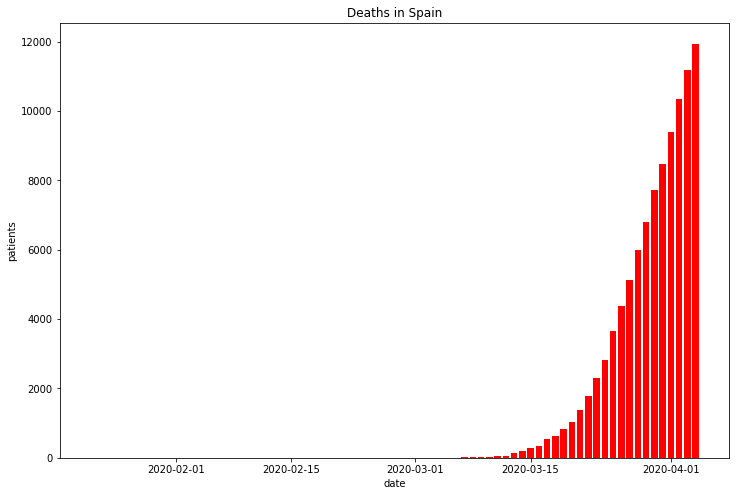

In [12]:
plt.title(f"Deaths in {country_name}")
plt.ylabel("patients")
plt.xlabel("date")
plt.style.use('ggplot')
plt.bar(country_cases["Date"], country_cases["Deaths"], color="r")
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True) # Set forward to True to resize window along with plot in figure.
plt.show()

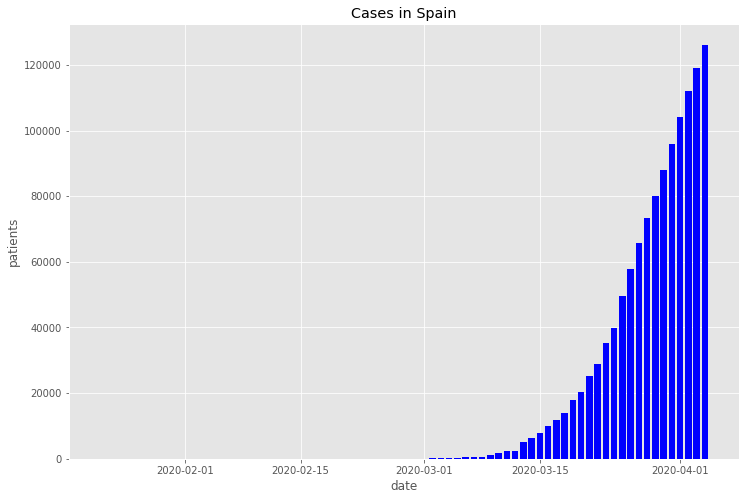

In [13]:
plt.title(f"Cases in {country_name}")
plt.ylabel("patients")
plt.xlabel("date")
plt.style.use('ggplot')
plt.bar(country_cases["Date"], country_cases["Confirmed"], color="b")
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True) # Set forward to True to resize window along with plot in figure.
plt.show()

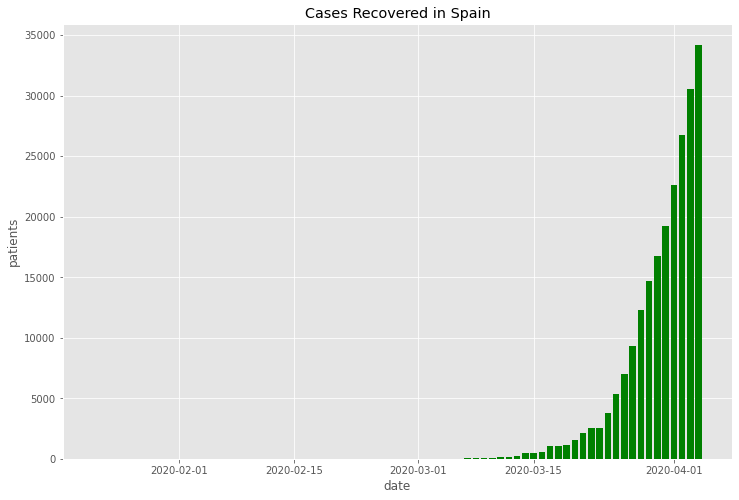

In [14]:
plt.title(f"Cases Recovered in {country_name}")
plt.ylabel("patients")
plt.xlabel("date")
plt.style.use('ggplot')
plt.bar(country_cases["Date"], country_cases["Recovered"], color="g")
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True) # Set forward to True to resize window along with plot in figure.
plt.show()